In [1]:
import  lib_Experimentum    as      Exp
from    Alessandria         import  *
from    Models              import  S_2_Generate, S_Dynamical_Form_Factor_2, S_Dynamical_Form_Factor_0, S_0_Generate

import pandas as pd
import  numpy               as      np
import  h5py 
from    scipy.io            import  loadmat

from    matplotlib.pyplot   import  plot
import  matplotlib.pyplot   as      plt


import  time

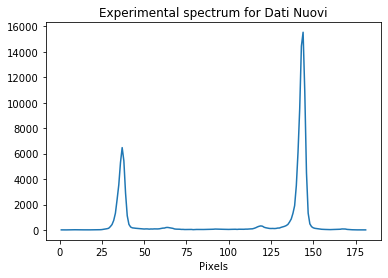

ATTENZIONE funzione da aggiornare



ATTENZIONE guarda Get_VIPA_mat


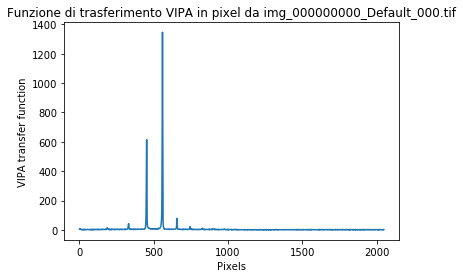

In [2]:
#1 ) Acquisizione Spettro e VIPA

y   =   loadmat('../2611_trento_K27M/y_new.mat')
y   =   y['y'][0][0]

y   =   y[:,0]

Data     =   Exp.Spectrum('Dati Nuovi')
Data.Get_Spectrum(how_to_get = 'by_passing', y = y, offset = 183., fig = 'Spectrum_Pix', save_path = '../figure/')
Data.Get_VIPA_tif(tif_filename = 'img_000000000_Default_000.tif', path ='../2611_trento_K27M/elastici_verdi/Pos0/', fig = 'VIPA_Pix', save_path = '../figure/')




 Ho trovato 4 picchi nel tuo spettro sperimentale con le caratteristiche richieste
 Altezza > 180.00 
 Spessore > 0.00 



 Il picco 1 ha: 	 indice = 36 	 x_value (Pix) = 37.00 	 ampiezza(Pix) = 4.12 


 Il picco 2 ha: 	 indice = 63 	 x_value (Pix) = 64.00 	 ampiezza(Pix) = 6.23 


 Il picco 3 ha: 	 indice = 118 	 x_value (Pix) = 119.00 	 ampiezza(Pix) = 4.33 


 Il picco 4 ha: 	 indice = 143 	 x_value (Pix) = 144.00 	 ampiezza(Pix) = 4.00 



 Ho trovato 5 picchi nel tuo spettro sperimentale con le caratteristiche richieste
 Altezza > 20.00 
 Spessore > 0.00 



 Il picco 1 ha: 	 indice = 330 	 x_value (Pix) = 331.00 	 ampiezza(Pix) = 5.50 


 Il picco 2 ha: 	 indice = 452 	 x_value (Pix) = 453.00 	 ampiezza(Pix) = 4.15 


 Il picco 3 ha: 	 indice = 558 	 x_value (Pix) = 559.00 	 ampiezza(Pix) = 3.57 


 Il picco 4 ha: 	 indice = 655 	 x_value (Pix) = 656.00 	 ampiezza(Pix) = 3.64 


 Il picco 5 ha: 	 indice = 743 	 x_value (Pix) = 744.00 	 ampiezza(Pix) = 4.23 



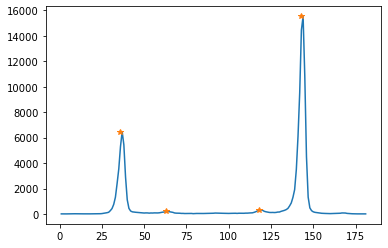

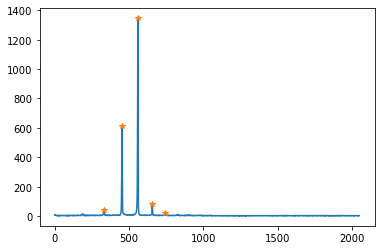

In [3]:
#2) Analizzo questi Spettri per capire come gestire le funzioni dopo
_,_ = Analyze_Peaks(Data.x_pix, Data.y, 'Pix', fig = True, verbose=True, height = 180, width = 0.00001)
_,_ = Analyze_Peaks(Data.x_VIPA, Data.y_VIPA, 'Pix', verbose=True, fig = True, height = 20, width = 0.00001)

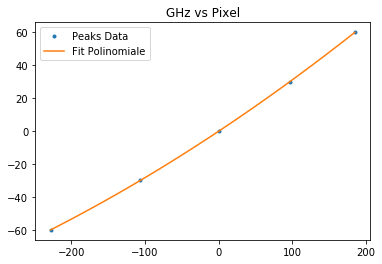

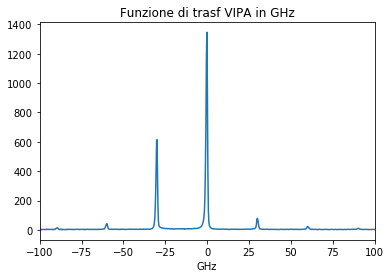

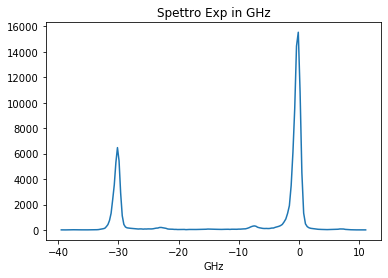

In [4]:
#3 converto tutto in GHz
Data.Fit_Pixel2GHz(fig = True, height = 20)
Data.VIPA_Pix2GHz(fig=True)
Data.Spectrum_Pix2GHz(fig=True)



 Ho trovato 4 picchi nel tuo spettro sperimentale con le caratteristiche richieste
 Altezza > 180.00 
 Spessore > 0.00 



 Il picco 1 ha: 	 indice = 36 	 x_value (GHz) = -30.16 	 ampiezza(GHz) = 4.12 


 Il picco 2 ha: 	 indice = 63 	 x_value (GHz) = -22.91 	 ampiezza(GHz) = 6.23 


 Il picco 3 ha: 	 indice = 118 	 x_value (GHz) = -7.46 	 ampiezza(GHz) = 4.33 


 Il picco 4 ha: 	 indice = 143 	 x_value (GHz) = -0.13 	 ampiezza(GHz) = 4.00 



Ho stimato 7 parametri iniziali per il fit che andrai a fare

Omega  = 7.726 

Gamma  = 0.528 

offset  = 72.849 

Co  = 1.000 

shift  = 0.000 

delta_amplitude  = 1.000 

delta_width  = 0.500 



 Ho trovato 3 picchi nel tuo spettro sperimentale con le caratteristiche richieste
 Altezza > 50.00 
 Spessore > 0.00 


Ho stimato i parametri della gaussiana come A = 1545.71	mu  = -8.44	sigma = 15.80
E li ho aggiunti ai parametri iniziali per il fit. Ora conosco 10 parametri su 12 



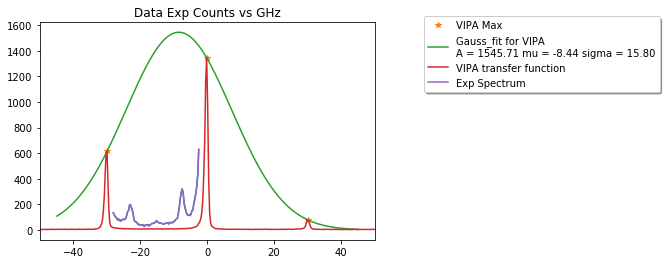

In [5]:
#4)Eseguo taglio dello Spettro sui picchi Brillouin
# e stimo gaussiana inviluppo dai dati VIPA

syg_kwargs = {'height' : 180, 'width' : 0.001}
Data.Cut_n_Estimate_Spectrum(cut = True, distanza = 0.5, verbose = True,  **syg_kwargs)

plt.figure()
plot(Data.x_freq, Data.y)
plt.title('Data Exp Counts vs GHz')


Data.Fit_VIPA_Gaussian(fig = True, height = 50, width = 0.0001)


Secondi impiegati per conv =  0.390625


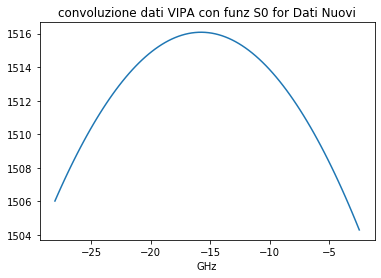

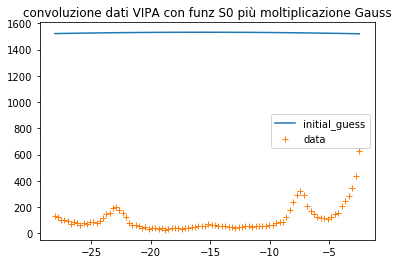

In [6]:
#5) Stimo parametri iniziali con un fit ridotto
#5A) piccola prova iniziale
p0  =   pd.DataFrame(Data.p0, columns = ('Co', 'Omega', 'Gamma', 'Delta', 'tau', 'delta_width','delta_amplitude', 'A', 'mu', 'sigma', 'shift', 'offset'))


start = time.process_time()
_ = Data.Gauss_Convolve_Markovian_Response(Data.p0.values[0], fig = True, compare = True)
print("Secondi impiegati per conv = ", time.process_time()-start)
#_ = Data.Gauss_Convolve_Theoretical_Response(Data.p0.values[0], fig = True)


Assumo vettore dei parametri iniziali da quelli stimati
 [ 1.00000000e+00  7.72648929e+00  5.27741419e-01  5.00000000e-01
  1.00000000e+00  1.54571352e+03 -8.43954419e+00  1.57973929e+01
  0.00000000e+00  7.28489510e+01] 

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         4.6137e+05                                    4.48e+05    
       1              3         3.4805e+05      1.13e+05       3.60e-01       9.88e+04    
       2              5         1.7769e+05      1.70e+05       5.74e-01       3.01e+05    
       3              7         1.2159e+05      5.61e+04       2.71e-01       5.42e+04    
       4              8         8.7557e+04      3.40e+04       5.01e-01       1.28e+05    
       5              9         7.4695e+04      1.29e+04       1.19e+00       6.52e+04    
       6             10         6.7930e+04      6.76e+03       2.53e+00       1.12e+05    
       7             13         6.5422e+04      

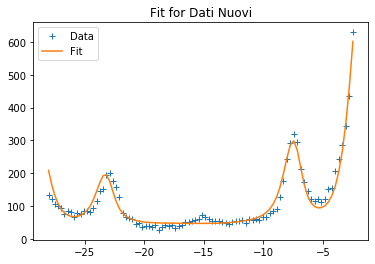

In [7]:
#5B) faccio er fit con modello markoviano 
bounds_down     =    [0,Get_Around(p0['Omega'][0], 0.1)[0],0,0,0, Get_Around(p0['A'][0], 0.1)[0], Get_Around(p0['mu'][0], 0.1)[0], Get_Around(p0['sigma'][0], 0.1)[0], -np.inf, -np.inf]
bounds_up       =    [np.inf, Get_Around(p0['Omega'][0], 0.1)[1],np.inf, np.inf, np.inf, Get_Around(p0['A'][0], 0.1)[1], Get_Around(p0['mu'][0], 0.1)[1], Get_Around(p0['sigma'][0], 0.1)[1], np.inf, np.inf]
Data.Non_Linear_Least_Squares_Markov(p0 = 'auto', my_method = 'least_squares', verbose = 2, fig = True, bound = (bounds_down, bounds_up), ftol = None)

Co     Omega     Gamma  delta_width  delta_amplitude            A  \
0  1.0  7.726489  0.527741          0.5              1.0  1545.713516   

         mu      sigma  shift     offset  
0 -8.439544  15.797393    0.0  72.848951  
              Co     Omega     Gamma     Delta    tau  delta_width  \
Values  0.651833  7.048363  0.254108  0.254108  100.0      1.20137   

        delta_amplitude            A        mu      sigma     shift     offset  
Values         0.898969  1612.249125 -9.283499  17.377132 -0.257747  14.114344  
              Co     Omega     Gamma     Delta    tau  delta_width  \
Values  0.651833  7.048363  0.254108  0.254108  100.0      1.20137   

        delta_amplitude            A        mu      sigma     shift     offset  
Values         0.898969  1612.249125 -9.283499  17.377132 -0.257747  14.114344  
Valore stimato della cost function prima del fit:
9055.201389709136


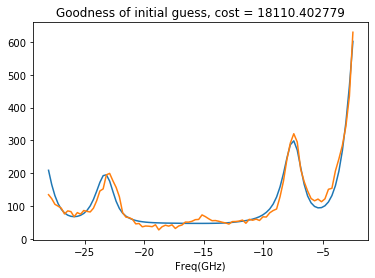

In [8]:
#6) je passo i risultati
Data.Estimate_Initial_Parameters()
print(Data.p0)
_ = Data.Take_A_Look_Before_Fitting()



Assumo vettore dei parametri iniziali da quelli stimati
 [ 6.51833273e-01  7.04836254e+00  2.54107707e-01  2.54107707e-01
  1.00000000e+02  1.20137037e+00  8.98968992e-01  1.61224912e+03
 -9.28349861e+00  1.73771322e+01 -2.57747301e-01  1.41143438e+01] 

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.8110e+04                                    3.77e+02    
       1              2         1.7868e+04      2.43e+02       1.63e+02       6.97e+02    
       2              3         1.7796e+04      7.17e+01       3.26e+02       2.03e+02    
       3              4         1.7773e+04      2.30e+01       6.69e+02       9.83e+01    
       4              5         1.7766e+04      6.99e+00       1.31e+03       3.92e+01    
       5              6         1.7765e+04      1.49e+00       2.54e+03       1.45e+01    
       6              8         1.7765e+04      9.84e-02       6.53e+02       7.23e+01    
       7        

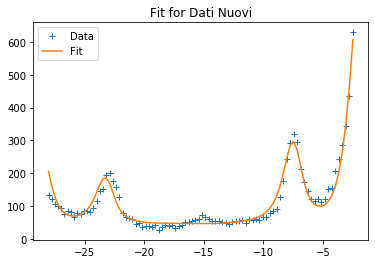

In [9]:
#7) faccio er fit markoviano +  rilassamento exp

Lower = Get_Around(Data.p0.values, 0.1)[0][0]

Upper= Get_Around(Data.p0.values, 0.1)[1][0]
Lower = np.concatenate((Lower[0:3], [0], [0], Lower[5:]))
Upper = np.concatenate((Upper[0:3], [np.inf], [np.inf], Upper[5:]))
Data.Non_Linear_Least_Squares(p0 = 'auto', my_method = 'least_squares', verbose = 2, fig = True,  bound = (Lower, Upper))




In [14]:
Data.Fit_Params

,Co,Omega,Gamma,Delta,tau,delta_width,delta_amplitude,A,mu,sigma,shift,offset
Values,0.717017,6.435556,0.228697,1.426882,0.628104,1.170473,0.955818,1.451117e+03,-10.211848,17.747975,-0.253592,12.724623
StdErrs,0.089406,0.601568,0.014087,2.365769,0.481168,0.004218,0.019638,1.352983e+08,1.536230,2.921179,0.001837,0.904769
Initials,0.651833,7.048363,0.254108,0.254108,100.000000,1.201370,0.898969,1.612249e+03,-9.283499,17.377132,-0.257747,14.114344
